In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

In [357]:
df = pd.read_excel("gdprussia.xlsx")
df

,year,oilprice,gdp
0,2018,71.06,1657.554647
1,2017,54.25,1578.624061
2,2016,43.55,1282.723881
3,2015,52.35,1363.594370
4,2014,99.03,2059.984158
5,2013,108.56,2297.128039
6,2012,111.63,2210.256977
7,2011,111.27,2051.661732
8,2010,79.47,1524.917468
9,2009,61.51,1222.644282


In [358]:
X = df[["oilprice"]].values
y = df[["gdp"]].values

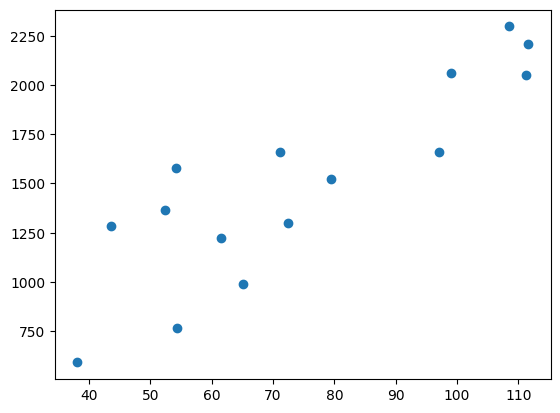

In [359]:
plt.scatter(df.oilprice, df.gdp)

In [360]:
model = tf.keras.Sequential([
    Input(shape=(1,)),
    Dense(64)
])

In [361]:
model.compile(optimizer="sgd", loss="mean_squared_error")

In [362]:
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 2497276.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2154860.2500
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1860626.6250
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1607795.2500
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1390540.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1203855.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1043439.3125
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 905595.8125
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 787148.3750
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 685368.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 597909.2500
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 522756.9688
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 458179.5312
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 402688.8438
Epoch 1

In [363]:
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 64)             │           128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130 (524.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [364]:
m = model.predict(X)
df["new"] = pd.DataFrame(m[:, 0])
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,year,oilprice,gdp,new
0,2018,71.06,1657.554647,1412.694580
1,2017,54.25,1578.624061,1078.703003
2,2016,43.55,1282.723881,866.108765
3,2015,52.35,1363.594370,1040.952637
4,2014,99.03,2059.984158,1968.419922
5,2013,108.56,2297.128039,2157.767822
6,2012,111.63,2210.256977,2218.764404
7,2011,111.27,2051.661732,2211.611816
8,2010,79.47,1524.917468,1579.789673
9,2009,61.51,1222.644282,1222.949219


In [365]:
model.predict(np.array([[100]]))[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([1987.6925], dtype=float32)